# Machine Learning Exercise 6 - Support Vector Machines¶


Here we will be using support vector machines (SVMs) to build a spam classifier.

We will begin with applying SVMS on some simple 2-dimensional datasets. Next we will apply the method on some processed data to build a classifer that will predict whether they are spam or not. 


 Let's load the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

raw_data = loadmat('ex6_data/ex6/ex6data1.mat')
raw_data

{'X': array([[ 1.9643  ,  4.5957  ],
        [ 2.2753  ,  3.8589  ],
        [ 2.9781  ,  4.5651  ],
        [ 2.932   ,  3.5519  ],
        [ 3.5772  ,  2.856   ],
        [ 4.015   ,  3.1937  ],
        [ 3.3814  ,  3.4291  ],
        [ 3.9113  ,  4.1761  ],
        [ 2.7822  ,  4.0431  ],
        [ 2.5518  ,  4.6162  ],
        [ 3.3698  ,  3.9101  ],
        [ 3.1048  ,  3.0709  ],
        [ 1.9182  ,  4.0534  ],
        [ 2.2638  ,  4.3706  ],
        [ 2.6555  ,  3.5008  ],
        [ 3.1855  ,  4.2888  ],
        [ 3.6579  ,  3.8692  ],
        [ 3.9113  ,  3.4291  ],
        [ 3.6002  ,  3.1221  ],
        [ 3.0357  ,  3.3165  ],
        [ 1.5841  ,  3.3575  ],
        [ 2.0103  ,  3.2039  ],
        [ 1.9527  ,  2.7843  ],
        [ 2.2753  ,  2.7127  ],
        [ 2.3099  ,  2.9584  ],
        [ 2.8283  ,  2.6309  ],
        [ 3.0473  ,  2.2931  ],
        [ 2.4827  ,  2.0373  ],
        [ 2.5057  ,  2.3853  ],
        [ 1.8721  ,  2.0577  ],
        [ 2.0103  ,  2.3546  ],
   

Let visualize the data with a scatterplot (+ stands for positive, o for negative).



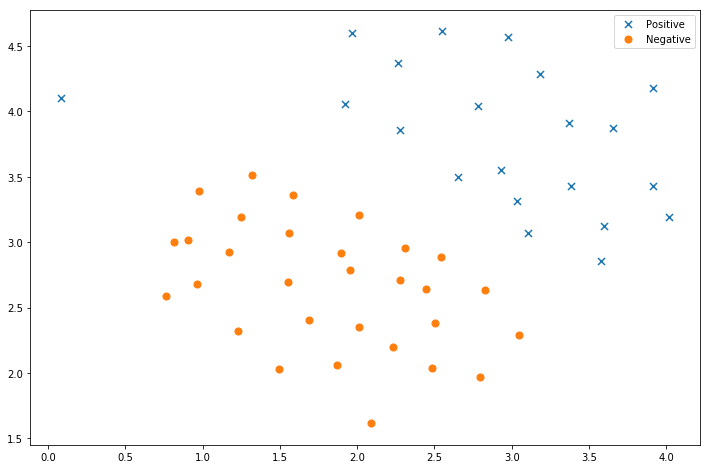

In [2]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()

You'll see one positive example that sits far away from the others. We're going to train a linear support vector machine to learn the class boundary. 


In [9]:
from sklearn import svm
svc = svm.LinearSVC(C=0.5, loss='hinge', max_iter=1000)
svc

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

C is like the regularization parameter in linear regression. Let's see the effect of C=1  on our model.



In [10]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

In [11]:
svc2 = svm.LinearSVC(C=90, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data. 

Text(0.5,1,'SVM (C=1) Decision Confidence')

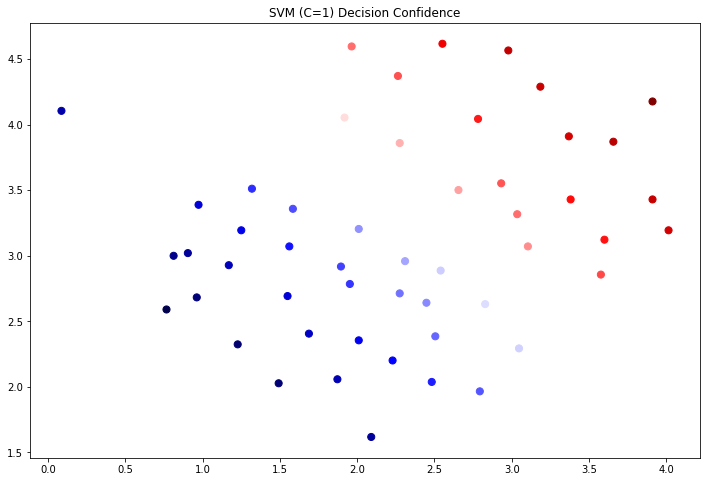

In [13]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

Text(0.5,1,'SVM (C=90) Decision Confidence')

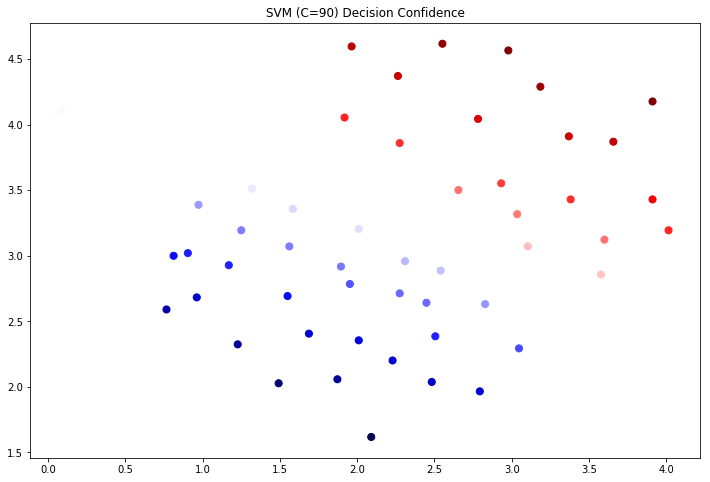

In [15]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=90) Decision Confidence')

The difference is a bit more clearly seen if you look at the color of the points near the decision boundary. 

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels. We're first tasked with implementing a gaussian kernel function.



In [17]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

In [18]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

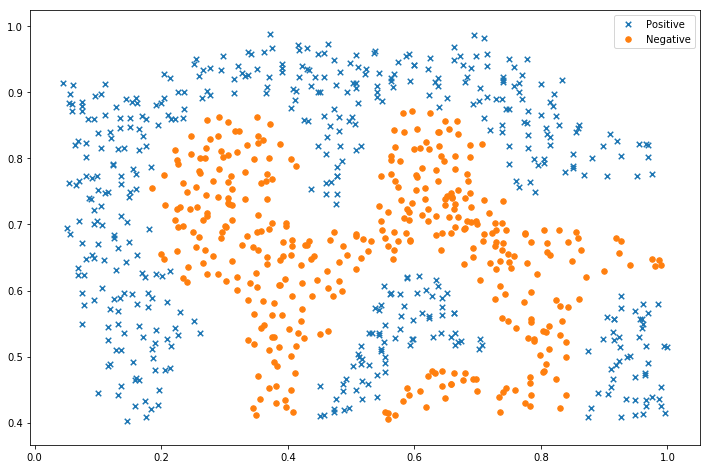

In [20]:
raw_data = loadmat('ex6_data/ex6/ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.



In [21]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

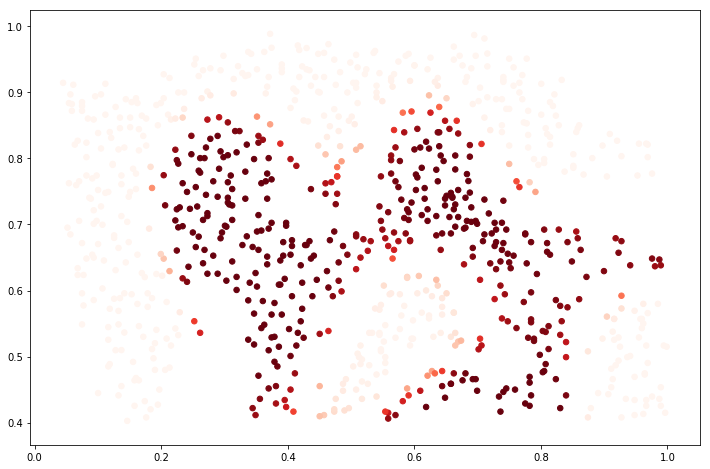

In [23]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')

For the third data set we're given both training and validation sets and tasked with finding optimal hyper-parameters for an SVM model based on validation set performance. 

In [24]:
raw_data = loadmat('ex6_data/ex6/ex6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.96499999999999997, {'C': 0.3, 'gamma': 100})

## Spam Classifier

Now we will use SVMs to build a spam filter. In the exercise text, there's a task involving some text pre-processing to get our data in a format suitable for an SVM to handle. 

In [25]:
spam_train = loadmat('ex6_data/ex6/spamTrain.mat')
spam_test = loadmat('ex6_data/ex6/spamTest.mat')

spam_train

{'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 'y': array([[1],
        [1],
        [0],
        ..., 
        [1],
        [0],
        [0]], dtype=uint8)}

In [26]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

Each document has been converted to a vector with 1,899 dimensions corresponding to the 1,899 words in the vocabulary. The values are binary, indicating the presence or absence of the word in the document. At this point, training and evaluation are just a matter of fitting the testing the classifer.



In [28]:
svc = svm.SVC()
svc.fit(X, y)
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))

Training accuracy = 94.4%


In [29]:
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))


Test accuracy = 95.3%
